# Setup

In [1]:
import sys
import os
from IPython.display import Image
import pandas as pd

# Replace with the actual path to your pyxations package
package_path = "../pyxations"
sys.path.append(package_path)

In [2]:
import pyxations as pyx

# Webgazer

## Dataset to BIDS

The filenames in the dataset folder are assumed to have the following structure: "arx_first_XXXXX.EDF"

Where "arx" is the subject id and "first" is the session name, both separated by an underscore.

In [3]:
current_folder = os.getcwd()
current_folder = os.path.join(os.path.dirname(current_folder),"tests","data")
files_folder_path = os.path.join(current_folder,"antisacadas_files")
bids_dataset_folder = pyx.dataset_to_bids(current_folder,files_folder_path,"antisacadas_dataset", format_name='webgazer')

In [4]:
print(bids_dataset_folder)

c:\Users\gonza\repos\pyxations\tests\data\antisacadas_dataset


## Compute derivatives

In [5]:
dataset_type = 'webgazer'
detection_algorithm = 'remodnav'
pyx.compute_derivatives_for_dataset(bids_dataset_folder, dataset_type, detection_algorithm, 
                                    overwrite=True, screen_height=768, screen_width=1024)

WindowsPath('c:/Users/gonza/repos/pyxations/tests/data/antisacadas_dataset_derivatives')

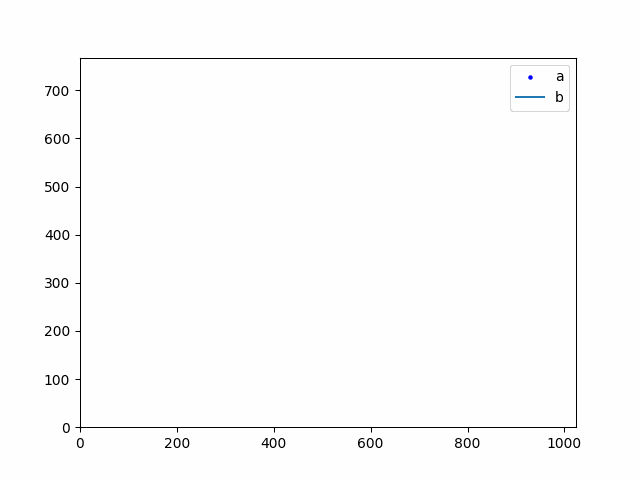

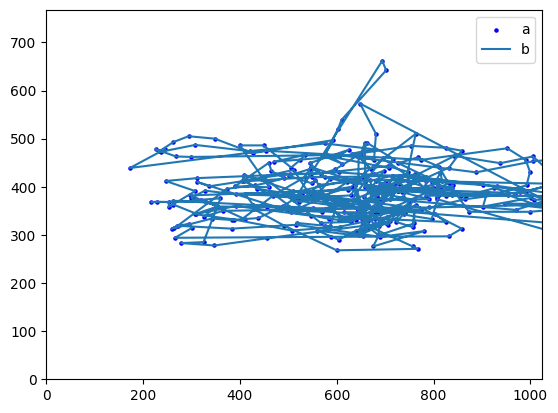

In [6]:
df_path = os.path.join(current_folder, "antisacadas_dataset_derivatives", "sub-0001", "ses-antisacadas", "samples.feather")
df = pd.read_feather(df_path)
out_filename = os.path.join(current_folder, "antisacadas_dataset_derivatives", "sub-0001", "ses-antisacadas", 'animWebgazer.gif')

vis  = pyx.SampleVisualization(df, screen_width=1024, screen_height=768)
vis.animate(display=False, out_file=out_filename)
Image(filename=out_filename) 

In [7]:
## Hacer otro notebook para Eyelink (completo)

## Correr deteccion eyelink y remodonav (para realizar algun tipo de comparacion)
## Plotly?
files_folder_path = os.path.join(current_folder,"example_files")
bids_dataset_folder = pyx.dataset_to_bids(current_folder,files_folder_path,"example_dataset")
msg_keywords = ["begin","end","press"]
start_msgs = {'search':['beginning_of_stimuli']}
end_msgs = {'search':['end_of_stimuli']}
derivatives_folder = pyx.compute_derivatives_for_dataset(bids_dataset_folder, 'eyelink', 'remodnav',
        msg_keywords=msg_keywords,start_msgs=start_msgs, end_msgs=end_msgs)

# Instanciar experimento con un dataset path


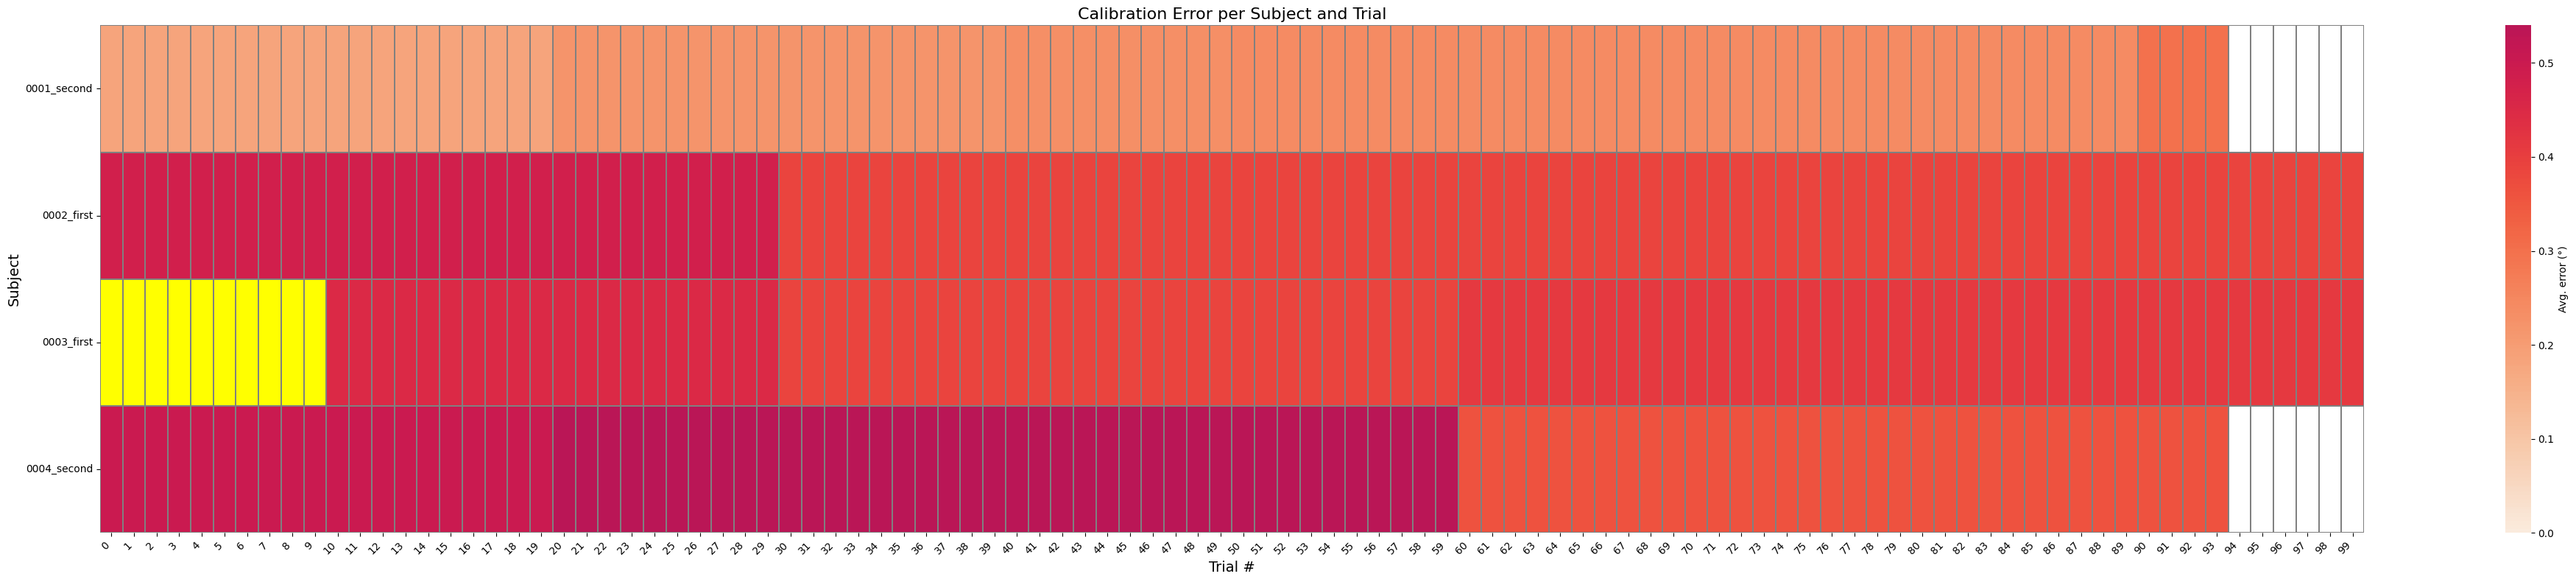

Removed 50 trials with poor calibration.
Removed 25 non answered trials
Removed 19 trials longer than 11 seconds.
Removed 2 trials for stimuli ['0113.jpg']
Removed 0 trials with NaN values.
Removed 0 sessions with poor accuracy
Removed 21 trials from stimuli with less than 0.5 accuracy.
Removed 3 fixations shorter than 50 ms.
Removed 28 fixations that were merged.


In [8]:
# Agregar docstring a clases de PostProcessing

# Proponer interfaz para trials por tiempo

# Testear trials por duracion
exp = pyx.VisualSearchExperiment(bids_dataset_folder,"search","mem")
exp.load_data("remodnav")
exp.plot_calib_data()
exp.drop_poor_or_non_calibrated_trials(0.5)
exp.remove_non_answered_trials()
exp.drop_trials_longer_than(11,"search")
exp.remove_trials_for_stimuli(["0113.jpg"])
exp.drop_trials_with_nan_threshold("search",0.1)
exp.remove_poor_accuracy_sessions(0.5)
exp.remove_trials_for_stimuli_with_poor_accuracy(0.5)
exp.filter_fixations()
exp.collapse_fixations(80.0)
exp.plot_multipanel(False)


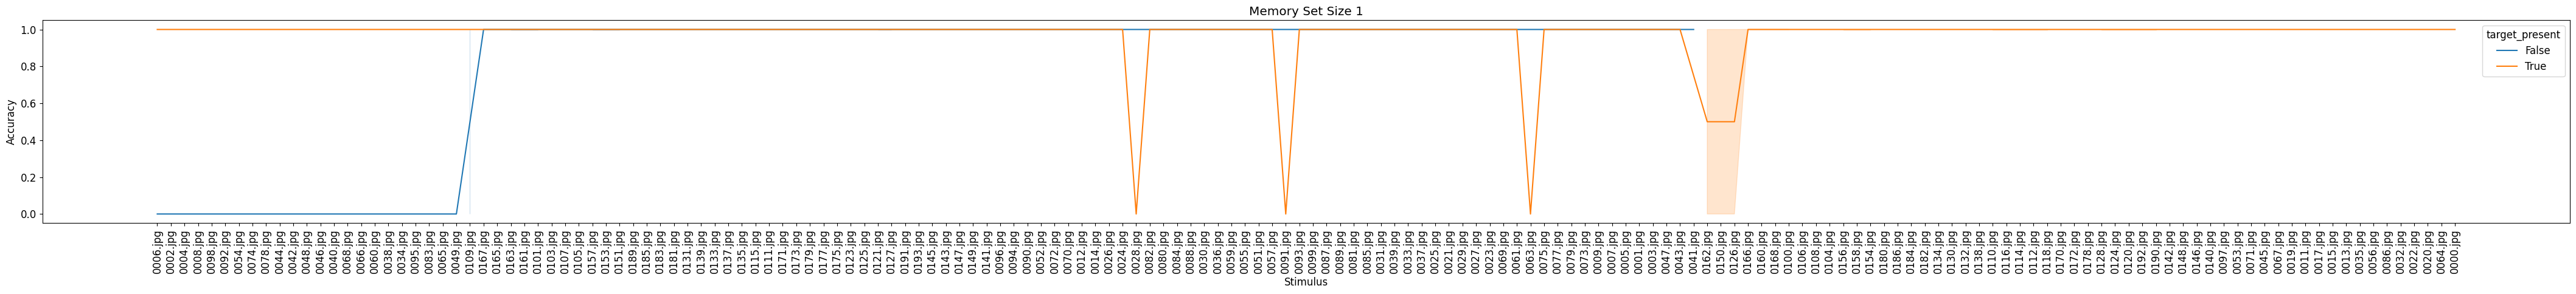

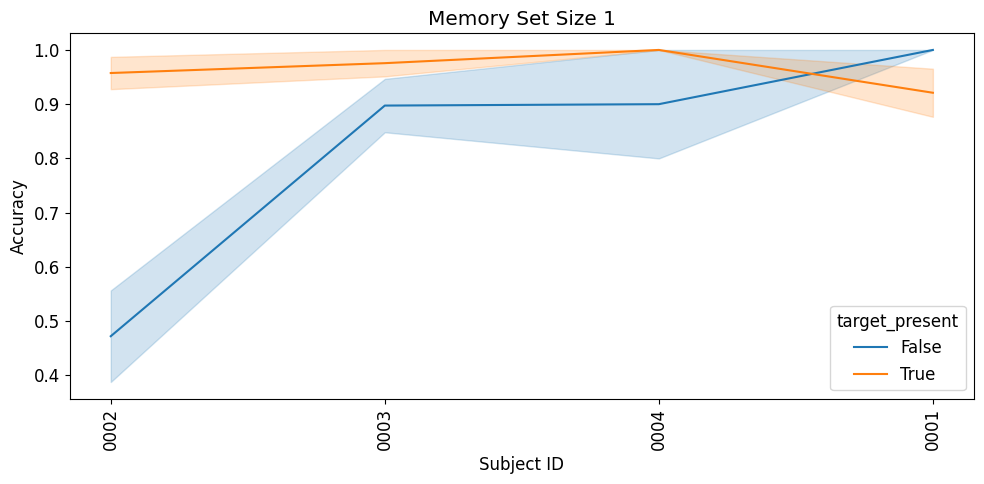

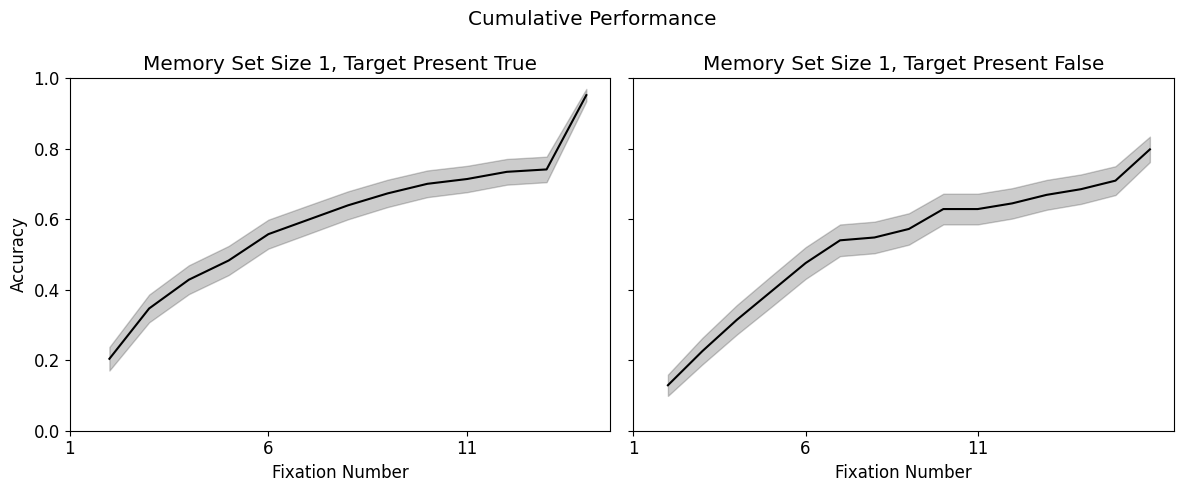

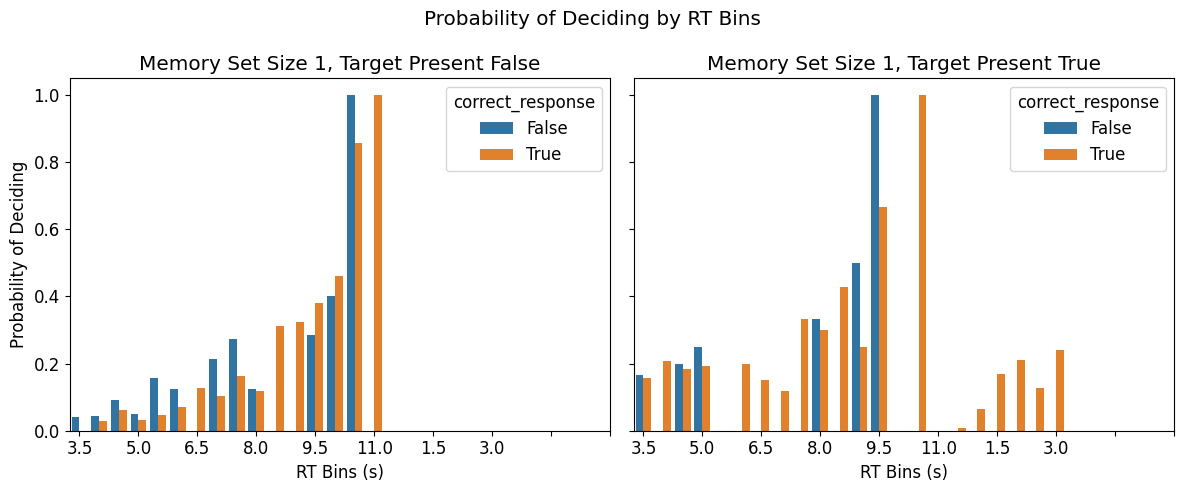

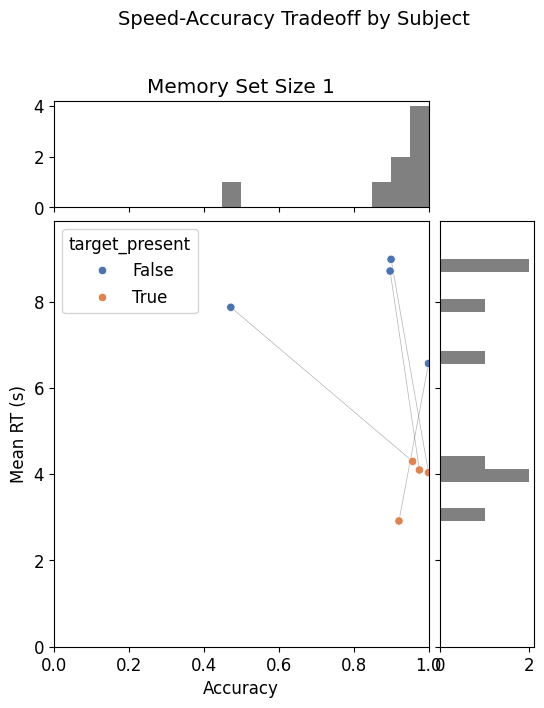

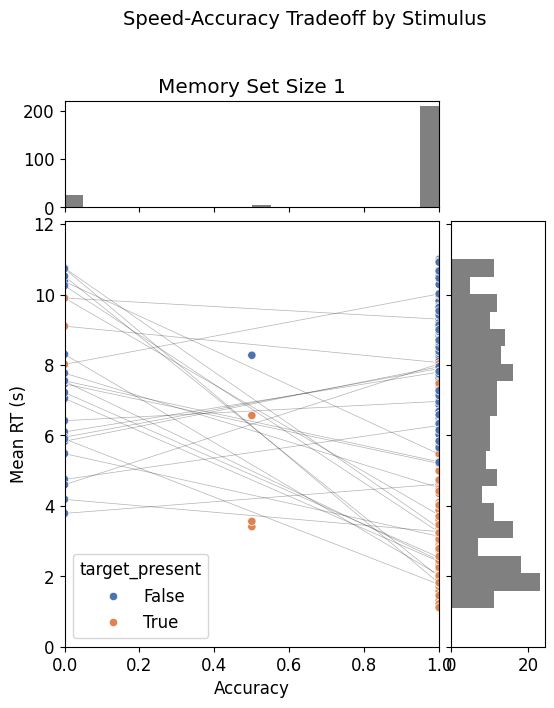

In [9]:
rts = exp.search_rts()
exp.plot_accuracy_by_stimulus()
exp.plot_accuracy_by_subject()
exp.plot_cumulative_performance()
exp.plot_probability_of_deciding_by_rt_bin(13,0.5)
exp.plot_speed_accuracy_tradeoff_by_subject()
exp.plot_speed_accuracy_tradeoff_by_stimulus()